# notes

In [2]:
import pandas as pd
import numpy as np
import pickle
import re 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pprint            # to turn off pretty printing

Pretty printing has been turned OFF


In [4]:
# open pickled out data from PELIC
f = open('/Users/elenacimino/Data-Archive/combo_df_1A_pt1.pkl', 'rb')
data = pickle.load(f)
f.close()

data.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
1,5,eq0,7505,I met my friend Nife while I was studying in a...,g,4,Arabic,1,"[i, met, my, friend, nife, while, i, was, stud...",177,"[I, met, my, friend, Nife, while, I, was, stud..."
2,5,am8,7506,"Ten years ago, I met a women on the train betw...",g,4,Thai,1,"[ten, years, ago, i, met, a, women, on, the, t...",137,"[Ten, years, ago, ,, I, met, a, women, on, the..."
3,12,dk5,7507,In my country we usually don't use tea bags. F...,w,4,Turkish,1,"[in, my, country, we, usually, don, t, use, te...",63,"[In, my, country, we, usually, do, n't, use, t..."
4,13,dk5,7507,I organized the instructions by time.,w,4,Turkish,1,"[i, organized, the, instructions, by, time]",6,"[I, organized, the, instructions, by, time, .]"
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,..."


In [18]:
# breakdown of data by native language (L1) and level 
data.groupby('native_language')['level_id'].value_counts()

native_language  level_id
                 3           3572
                 4           3200
                 5           2048
                 2            123
Arabic           4           4376
                 5           3732
                 3           3606
                 2            771
Chinese          5           3241
                 4           2360
                 3           1246
                 2            108
English          3             74
                 2             52
                 4             16
                 5             12
Farsi            4             43
                 3             26
                 5             10
French           5            194
                 4            169
                 3             68
German           3             25
                 5             23
                 4             11
Hebrew           5             62
                 4             13
                 3              3
Italian          5    

In [106]:
# interested in Arabic, Korean, and Spanish
# I want the first version of writing only, level should be greater than 2, and essasys should be at least 10 tokens
# I want only the samples from 'writing' class -- grammar ('g') might have article exercises, and speaking ('s') activities are not available in BALC, only writing
target_langs = ['Arabic', 'Korean', 'Spanish']
filters = (data.native_language.isin(target_langs)) & \
          (data.version == 1) & (data.level_id >= 2) & \
          (data.toks_re_len >= 10) & (data.class_code == 'w')

In [107]:
# looking at what we have
data[filters].groupby('native_language')['level_id'].value_counts()

native_language  level_id
Arabic           4           1218
                 5           1006
                 3            593
                 2             44
Korean           4            827
                 5            620
                 3            298
                 2             36
Spanish          4            155
                 5             91
                 3             64
Name: level_id, dtype: int64

In [108]:
# apply filters to data to get target data
target_data = data[filters]

In [109]:
# getting Arabic only
arabic = target_data[target_data.native_language == 'Arabic']
arabic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
17,10,fy0,7514,1- Go outside and hangout with friend for most...,w,4,Arabic,1,"[go, outside, and, hangout, with, friend, for,...",48,"[1, -, Go, outside, and, hangout, with, friend..."
21,12,fq0,7517,How To Make a Nice Tea\n\n You have to f...,w,4,Arabic,1,"[how, to, make, a, nice, tea, you, have, to, f...",60,"[How, To, Make, a, Nice, Tea, You, have, to, f..."
26,10,du6,7520,"Befor two years i tryed to get my toefl score,...",w,4,Arabic,1,"[befor, two, years, i, tryed, to, get, my, toe...",97,"[Befor, two, years, i, tryed, to, get, my, toe..."
30,12,er4,7523,when you want to enjoy drinking a tea you have...,w,4,Arabic,1,"[when, you, want, to, enjoy, drinking, a, tea,...",107,"[when, you, want, to, enjoy, drinking, a, tea,..."
34,10,bf0,7525,How to fail a test\n\n There are severa...,w,4,Arabic,1,"[how, to, fail, a, test, there, are, several, ...",171,"[How, to, fail, a, test, There, are, several, ..."


In [110]:
# Korean only
korean = target_data[target_data.native_language == 'Korean']
korean.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,..."
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e..."
16,13,hb4,7513,Every paragragh's instructions depend on a mai...,w,4,Korean,1,"[every, paragragh, s, instructions, depend, on...",28,"[Every, paragragh, 's, instructions, depend, o..."


In [111]:
# Spanish only
spanish = target_data[target_data.native_language == 'Spanish']
spanish.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
136,17,ea7,7791,My mother is the most beautiful person that I ...,w,5,Spanish,1,"[my, mother, is, the, most, beautiful, person,...",99,"[My, mother, is, the, most, beautiful, person,..."
324,35,ea7,8548,"The town of Decasia, located in Illinois is go...",w,5,Spanish,1,"[the, town, of, decasia, located, in, illinois...",84,"[The, town, of, Decasia, ,, located, in, Illin..."
550,62,ea7,8779,"The town of Decasia, located in Illinois is go...",w,5,Spanish,1,"[the, town, of, decasia, located, in, illinois...",112,"[The, town, of, Decasia, ,, located, in, Illin..."
1000,89,ea7,10108,Very dificult to say which sport is the most p...,w,5,Spanish,1,"[very, dificult, to, say, which, sport, is, th...",101,"[Very, dificult, to, say, which, sport, is, th..."
1145,107,gq4,10314,Limiting students' time on-line in school's co...,w,4,Spanish,1,"[limiting, students, time, on, line, in, schoo...",168,"[Limiting, students, ', time, on-line, in, sch..."


In [112]:
# These essays get long! CEPA caps out at about 400 tokens. We'll filter again
arabic.groupby('level_id')['toks_re_len'].describe()

,count,mean,std,min,25%,50%,75%,max
level_id,,,,,,,,
2,44.0,23.068182,41.813205,10.0,12.0,15.0,21.25,291.0
3,593.0,106.006745,85.144491,10.0,24.0,95.0,150.00,473.0
4,1218.0,216.794745,174.703733,10.0,53.0,195.0,339.00,1215.0
5,1006.0,244.884692,291.110901,10.0,24.0,127.0,381.00,2326.0


In [113]:
# Same as above -- we'll need to filter out the longer essays
korean.groupby('level_id')['toks_re_len'].describe()

,count,mean,std,min,25%,50%,75%,max
level_id,,,,,,,,
2,36.0,17.472222,8.237497,10.0,11.75,15.0,21.25,44.0
3,298.0,131.939597,83.013181,10.0,79.00,123.5,174.75,405.0
4,827.0,241.284160,193.215402,10.0,69.00,202.0,373.00,1482.0
5,620.0,251.411290,323.263933,10.0,20.00,92.0,438.00,2059.0


In [114]:
# Spanish has no qualifying level 2... we'll do levels 3-5, then
spanish.groupby('level_id')['toks_re_len'].describe()

,count,mean,std,min,25%,50%,75%,max
level_id,,,,,,,,
3,64.0,118.890625,86.889661,10.0,61.0,104.0,160.75,400.0
4,155.0,241.993548,222.627389,10.0,40.0,193.0,379.50,853.0
5,91.0,225.857143,236.278206,10.0,36.0,156.0,352.00,947.0


In [115]:
# import seaborn and plt
import seaborn as sns
import matplotlib as plt

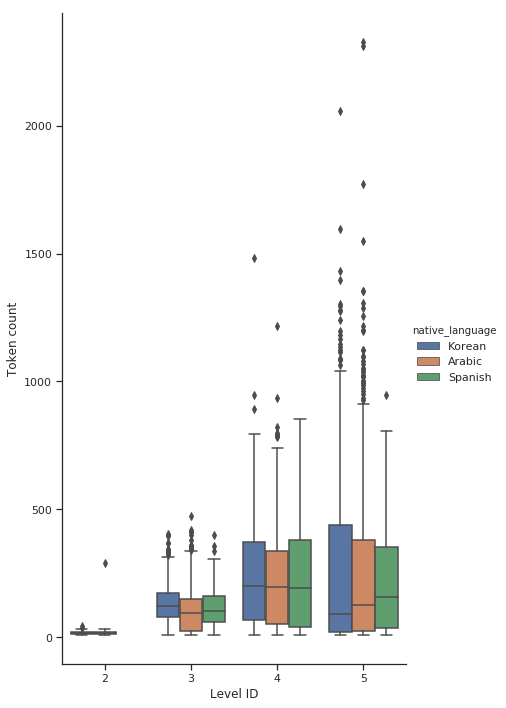

In [116]:
# Look at that distribution!
fig1 = sns.catplot(x='level_id', y='toks_re_len', kind='box', data=target_data, hue='native_language', 
            height=10, aspect=0.6)
fig1.set_axis_labels(x_var="Level ID", y_var="Token count")

In [117]:
# Applying length filter to cap out so we have a comparable sample with CEPA essays
filters2 = (data.toks_re_len <= 400)
smaller_target = data[filters & filters2]
smaller_target.groupby('native_language')['level_id'].value_counts()

native_language  level_id
Arabic           4           1033
                 5            764
                 3            589
                 2             44
Korean           4            640
                 5            455
                 3            296
                 2             36
Spanish          4            123
                 5             75
                 3             64
Name: level_id, dtype: int64

In [118]:
# smaller dfs
arabic2 = smaller_target[smaller_target.native_language == 'Arabic']
korean2 = smaller_target[smaller_target.native_language == 'Korean']
spanish2 = smaller_target[smaller_target.native_language == 'Spanish']

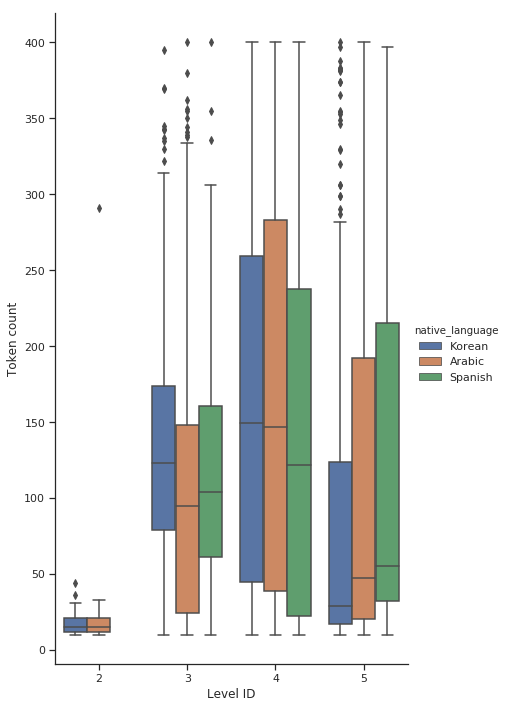

In [122]:
# Target samples, save as png
fig2 = sns.catplot(x='level_id', y='toks_re_len', kind='box', data=smaller_target, hue='native_language', 
            height=10, aspect=0.6)
fig2.set_axis_labels(x_var="Level ID", y_var="Token count")
fig2.savefig('PELIC_writing_tokcounts.png')

In [121]:
# save as a private csv file
smaller_target.to_csv("../private/pelic_targets.csv")

### Now for the lemma information

In [124]:
# so that I can compare lemma information with CEPA
arabic_lemmas = pd.read_csv('/Users/elenacimino/Alan-Workspace/FREQ_Lists/Arabic_Level_3_FREQ2000_AAAL.csv', 
                           index_col=[0])
arabic_lemmas.head()

,lemma,count
1,the,46073.0
2,be,41895.0
3,i,34769.0
4,to,34572.0
5,and,25170.0


In [129]:
# I'll be comparing this with CEPA...
spanish_lemmas = pd.read_csv('/Users/elenacimino/Alan-Workspace/FREQ_Lists/SPAN_Level3_FREQ2000_Lema.csv',
                            index_col=[0])
spanish_lemmas.head()

,lemma,count,per mil,totall words
NaN,NaN,NaN,50.372758,19852.0
1.0,i,54352.0,NaN,NaN
2.0,the,53043.0,NaN,NaN
3.0,be,51531.0,NaN,NaN
4.0,to,31332.0,NaN,NaN


In [130]:
# for comparison...
korean_lemmas = pd.read_csv('/Users/elenacimino/Alan-Workspace/FREQ_Lists/Korean_Level3_FREQ2000_Lem.csv',
                            index_col=[0])
korean_lemmas.head()

,lemma,count per m,per m x,Total Word count
NaN,NaN,NaN,13.37,"74,819"
1.0,be,50816.0,NaN,NaN
2.0,i,49667.0,NaN,NaN
3.0,a,33361.0,NaN,NaN
4.0,the,33160.0,NaN,NaN
